# SQL Python

## Create a Connection

In [24]:
!pip install pymysql
!pip install cryptography

In [11]:
import getpass
password = getpass.getpass()

In [14]:
import pymysql

cnx = pymysql.connect(user='root', password= password,
                      host='localhost', database='sakila')
if cnx.open:
    print("Connection success")
else:
    print("Connection did not succeeded")


Connection success


## Connector

In [15]:
# the object which will interact with the database
cursor = cnx.cursor()

## READ DATA - Execute the query and retrieve results

In [16]:
#Execute the Query
query = "SELECT * FROM sakila.actor;"
cursor.execute(query)

# The query has been exectued at this point, but the results are still in the cursor
result = cursor.fetchall()

for element in result:
    print(element)
    

#print(type(result))

# this object returns to you the metadata of the selected table
cursor.description
# returns the METADATA

(1, 'PENELOPE', 'GUINESS', datetime.datetime(2006, 2, 15, 4, 34, 33))
(2, 'NICK', 'WAHLBERG', datetime.datetime(2006, 2, 15, 4, 34, 33))
(3, 'ED', 'CHASE', datetime.datetime(2006, 2, 15, 4, 34, 33))
(4, 'JENNIFER', 'DAVIS', datetime.datetime(2006, 2, 15, 4, 34, 33))
(5, 'JOHNNY', 'LOLLOBRIGIDA', datetime.datetime(2006, 2, 15, 4, 34, 33))
(6, 'BETTE', 'NICHOLSON', datetime.datetime(2006, 2, 15, 4, 34, 33))
(7, 'GRACE', 'MOSTEL', datetime.datetime(2006, 2, 15, 4, 34, 33))
(8, 'MATTHEW', 'JOHANSSON', datetime.datetime(2006, 2, 15, 4, 34, 33))
(9, 'JOE', 'SWANK', datetime.datetime(2006, 2, 15, 4, 34, 33))
(10, 'CHRISTIAN', 'GABLE', datetime.datetime(2006, 2, 15, 4, 34, 33))
(11, 'ZERO', 'CAGE', datetime.datetime(2006, 2, 15, 4, 34, 33))
(12, 'KARL', 'BERRY', datetime.datetime(2006, 2, 15, 4, 34, 33))
(13, 'UMA', 'WOOD', datetime.datetime(2006, 2, 15, 4, 34, 33))
(14, 'VIVIEN', 'BERGEN', datetime.datetime(2006, 2, 15, 4, 34, 33))
(15, 'CUBA', 'OLIVIER', datetime.datetime(2006, 2, 15, 4, 34,

(('actor_id', 2, None, 5, 5, 0, False),
 ('first_name', 253, None, 180, 180, 0, False),
 ('last_name', 253, None, 180, 180, 0, False),
 ('last_update', 7, None, 19, 19, 0, False))

## Load data in Pandas

In [17]:
import pandas as pd

col_names = [header[0] for header in cursor.description]
actors = pd.DataFrame(result, columns = col_names)
actors.head()
# and now its the usual pandas game.

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33


Decorators that can be used 

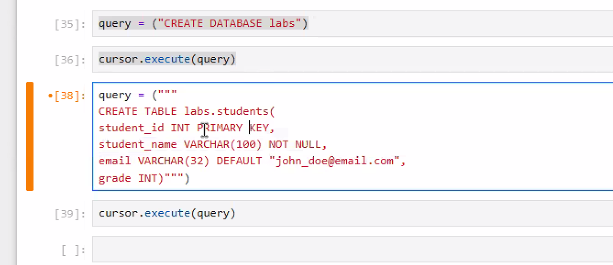

## Save and Close the connection

In [18]:
# The Python Wrapper for MSQL has generated changes to the database 
# which must now be committed, this is done with the command
# it's like "Saving" the changes made
cnx.commit()
#The cursor object has done it's job
cursor.close()
# and we now close the connection, you must always do this (good practice) or else the database might not be responsive to other connections.
cnx.close() 


# Connection Closed?
query = "SELECT * FROM sakila.actor;"
cursor.execute(query)

ProgrammingError: Cursor closed

## Pandas vs SQL

In [19]:
import pymysql

cnx = pymysql.connect(user='root', password= password,
                      host='localhost', database='sakila')
if cnx.open:
    print("Connection open")
else:
    print("Connection is not successfully open")

# the object which will interact with the database
cursor = cnx.cursor()

Connection open


### In Pandas...

In [20]:
import time

t1 = time.time()

query1 = ("SELECT * FROM sakila.actor;")
query2 = ("SELECT * FROM sakila.film_actor;")
query3 = ("SELECT * FROM sakila.film;")

# execute the query with the cursor
cursor.execute(query1)
# store the result in a python variable (list of tuples)
result1 = cursor.fetchall()
# convert my python variable to a dataframe
actors = pd.DataFrame(result1, columns = [header[0] for header in cursor.description])

cursor.execute(query2)
result2 = cursor.fetchall()
films_actors = pd.DataFrame(result2, columns = [header[0] for header in cursor.description])

cursor.execute(query3)
result3 = cursor.fetchall()
films = pd.DataFrame(result3, columns = [header[0] for header in cursor.description])

bridge = pd.merge(actors, films_actors, on='actor_id')
final = pd.merge(bridge, films, on = 'film_id')

print(time.time()-t1)
final.head(3)

0.05758380889892578


,actor_id,first_name,last_name,last_update_x,film_id,last_update_y,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33,1,2006-02-15 05:05:03,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,1,PENELOPE,GUINESS,2006-02-15 04:34:33,23,2006-02-15 05:05:03,ANACONDA CONFESSIONS,A Lacklusture Display of a Dentist And a Denti...,2006,1,None,3,0.99,92,9.99,R,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,1,PENELOPE,GUINESS,2006-02-15 04:34:33,25,2006-02-15 05:05:03,ANGELS LIFE,A Thoughtful Display of a Woman And a Astronau...,2006,1,None,3,2.99,74,15.99,G,Trailers,2006-02-15 05:03:42


### In SQL

In [16]:
# the alternative would be 
t1 = time.time()

query = ("SELECT * \
         from sakila.actor as a INNER JOIN sakila.film_actor as fa \
                 on a.actor_id = fa.actor_id \
                     INNER JOIN sakila.film as f \
                         on f.film_id = fa.film_id ;")

cursor.execute(query)

results = cursor.fetchall()
df = pd.DataFrame(results, columns = [header[0] for header in cursor.description])

print(time.time()-t1)
df.head(3)

0.21159982681274414


,actor_id,first_name,last_name,last_update,actor_id,film_id,last_update,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33,1,1,2006-02-15 05:05:03,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,1,PENELOPE,GUINESS,2006-02-15 04:34:33,1,23,2006-02-15 05:05:03,23,ANACONDA CONFESSIONS,A Lacklusture Display of a Dentist And a Denti...,2006,1,None,3,0.99,92,9.99,R,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,1,PENELOPE,GUINESS,2006-02-15 04:34:33,1,25,2006-02-15 05:05:03,25,ANGELS LIFE,A Thoughtful Display of a Woman And a Astronau...,2006,1,None,3,2.99,74,15.99,G,Trailers,2006-02-15 05:03:42


## Inject and Manipulate data
(Showcase with MySQL WorkBench side by side)

In [19]:
query = ("SELECT * FROM sakila.actor;")
# execute the query -> we need to call the cursor to execute our query
cursor.execute(query)

# this cursos currently holds the results of that query
results = cursor.fetchall()

import pandas as pd

actors_df = pd.DataFrame(results)
actors_df["full name"] = actors_df[1] + " " +  actors_df[2] 

actors_df



In [21]:
query = ("""CREATE DATABASE labs""")
cursor.execute(query)

#X = input("please enter your default email")

query = ("""CREATE TABLE IF NOT EXISTS
labs.demo(
student_id INT PRIMARY KEY,
student_name VARCHAR(52),
email VARCHAR(32) DEFAULT "john_doe@gmail.com",
coolness INT NOT NULL)""")

cursor.execute(query)

0

In [22]:
for index,fullname in zip(actors_df[0],actors_df['full name']):
    query = """INSERT INTO labs.demo(student_id, student_name, coolness) VALUES (""" + str(index+1000) +", \""+ fullname + "\",  10);"
    cursor.execute(query)

## DROP DB for next lesson:
#query = "DROP DATABASE labs"
#cursor.execute(query)

In [17]:
# The Python Wrapper for MSQL has generated changes to the database which must now be committed, this is done with the command
# it's like "Saving" the changes made
cnx.commit()
#The cursor object has done it's job
cursor.close()
# and we now close the connection, you must always do this (good practice) or else the database might not be responsive to other connections.
cnx.close() 